<a href="https://colab.research.google.com/github/alimoorreza/CS167-notes/blob/main/Day20_Multilayer_Perceptron_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CS167: Da20
## Multilayer Perceptron

#### CS167: Machine Learning, Fall 2023

Thursday, 9th, 2023


## Load your data:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## MLP Code

Last thing we'll use from `sklearn`.

In [ ]:
from google.colab import drive
import pandas
drive.mount('/content/drive')

In [ ]:
import pandas
path = 'datasets/irisData.csv' #'/content/drive/MyDrive/CS167/datasets/irisData.csv'
data = pandas.read_csv(path)
data.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
import pandas
import numpy
from sklearn.model_selection import train_test_split

#Split the dataset
predictors = data.columns.drop('species')
target = "species"
train_data, test_data, train_sln, test_sln = train_test_split(data[predictors], data[target], test_size = 0.2, random_state=41)

#Normalize Data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_data)
train_data_norm = scaler.transform(train_data)
test_data_norm = scaler.transform(test_data)

## Build a MLP using `sklearn`

Accuracy:  0.9


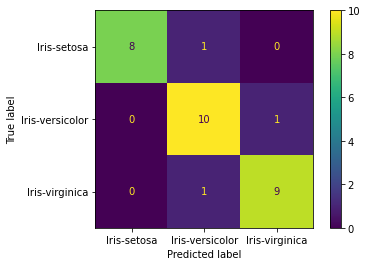

In [ ]:
# Set up MLP
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

mlp = MLPClassifier(random_state=0,hidden_layer_sizes = (100,), max_iter = 800)
mlp.fit(train_data_norm,train_sln)
predictions = mlp.predict(test_data_norm)

print("Accuracy: ", metrics.accuracy_score(test_sln,predictions))

# Confusion Matrix
vals = data[target].unique() ## possible classification values (species)
conf_mat = metrics.confusion_matrix(test_sln, predictions, labels=vals)

#print(pandas.DataFrame(conf_mat, index = "True " + vals, columns = "Pre " + vals))

disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat,display_labels=mlp.classes_)
disp.plot()
plt.show()

# 💬 Goup Exercise:
## In-Class Exercise #1:

1. Read in the Boston Housing dataset
2. Normalize your data
3. Use a [`MLPRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html) to predict the price of a house 'MEDV'
4. Play around with changing the parameters, see what the best R2 score you can get is.


In [ ]:
# Your code goes here for the In-Class Exercise
# 1. Read in the Boston Housing dataset
import pandas
housing_data = pandas.read_csv('/content/drive/MyDrive/CS167/datasets/boston_housing.csv')

# clean the data
housing_data['CRIM'].fillna(housing_data['CRIM'].mean(),inplace=True)
housing_data['ZN'].fillna(housing_data['ZN'].mean(),inplace=True)
housing_data['INDUS'].fillna(housing_data['INDUS'].mean(),inplace=True)
housing_data['CHAS'].fillna(housing_data['CHAS'].mean(),inplace=True)
housing_data['AGE'].fillna(housing_data['AGE'].mean(),inplace=True)
housing_data['LSTAT'].fillna(housing_data['LSTAT'].mean(),inplace=True)

#Split the dataset
predictors = housing_data.columns.drop('MEDV')
target = "MEDV"
train_data, test_data, train_sln, test_sln = train_test_split(housing_data[predictors], housing_data[target], test_size = 0.2, random_state=0)


In [ ]:
#2. Normalize the data
from sklearn.preprocessing import StandardScaler


In [ ]:
#3. Use a MLPRegressor to predict the price of a house 'MEDV'
from sklearn.neural_network import MLPRegressor
from sklearn import metrics



In [ ]:
#4. Play around with the parameters